# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [15]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [17]:
bv_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True, margins_name='Total')
bv_sex = bv_sex.rename({0.0: 'Feminino', 1.0: 'Masculino', 'Total': 'Total'})

In [18]:
bv_sex['Probabilidade'] = round(bv_sex[1] / bv_sex['Total'], 2)
bv_sex

flag_doente,0,1,Total,Probabilidade
sex,,,,
Feminino,72,25,97,0.26
Masculino,92,114,206,0.55
Total,164,139,303,0.46


In [19]:
bv_sex['Odd'] = round(bv_sex[1] / bv_sex[0], 2)
bv_sex

flag_doente,0,1,Total,Probabilidade,Odd
sex,,,,,
Feminino,72,25,97,0.26,0.35
Masculino,92,114,206,0.55,1.24
Total,164,139,303,0.46,0.85


In [20]:
bv_sex['OddRatio'] = round(bv_sex['Odd'] / bv_sex.loc['Feminino', 'Odd'] ,2)
bv_sex
                                                                        

flag_doente,0,1,Total,Probabilidade,Odd,OddRatio
sex,,,,,,
Feminino,72,25,97,0.26,0.35,1.00
Masculino,92,114,206,0.55,1.24,3.54
Total,164,139,303,0.46,0.85,2.43


In [21]:
bv_sex['Logito'] = np.log(bv_sex['Odd'])
bv_sex

flag_doente,0,1,Total,Probabilidade,Odd,OddRatio,Logito
sex,,,,,,,
Feminino,72,25,97,0.26,0.35,1.00,-1.049822
Masculino,92,114,206,0.55,1.24,3.54,0.215111
Total,164,139,303,0.46,0.85,2.43,-0.162519


In [22]:
bv_sex['WOE'] = np.log(bv_sex['OddRatio'])
bv_sex

flag_doente,0,1,Total,Probabilidade,Odd,OddRatio,Logito,WOE
sex,,,,,,,,
Feminino,72,25,97,0.26,0.35,1.00,-1.049822,0.000000
Masculino,92,114,206,0.55,1.24,3.54,0.215111,1.264127
Total,164,139,303,0.46,0.85,2.43,-0.162519,0.887891


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [23]:
def age_category(x):
    if x < 40:
        return "-40"
    elif x>=40 and x<50:
        return "40-49"
    elif x>=50 and x<60:
        return "50-59"
    elif x>=60 and x<70:
        return "60-69"
    else:
        return "70+"
df['age_category'] = df['age'].apply(age_category)
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_category
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,60-69
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,60-69
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,60-69


In [24]:
bv_age = pd.crosstab(df['age_category'], df['flag_doente'], margins=True, margins_name='Total')
bv_age

flag_doente,0,1,Total
age_category,,,
-40,11,4,15
40-49,50,22,72
50-59,65,60,125
60-69,32,49,81
70+,6,4,10
Total,164,139,303


In [25]:
bv_age['Prob'] = round(bv_age[1] / bv_age['Total'], 2)
bv_age['Odd'] = round(bv_age[1] / bv_age[0], 2)
bv_age['OddRatio'] = round(bv_age['Odd'] / bv_age.loc['-40', 'Odd'], 2)
bv_age['Logito'] = np.log(bv_age['Odd'])
bv_age['WOE'] = np.log(bv_age['OddRatio'])
bv_age

flag_doente,0,1,Total,Prob,Odd,OddRatio,Logito,WOE
age_category,,,,,,,,
-40,11,4,15,0.27,0.36,1.00,-1.021651,0.000000
40-49,50,22,72,0.31,0.44,1.22,-0.820981,0.198851
50-59,65,60,125,0.48,0.92,2.56,-0.083382,0.940007
60-69,32,49,81,0.60,1.53,4.25,0.425268,1.446919
70+,6,4,10,0.40,0.67,1.86,-0.400478,0.620576
Total,164,139,303,0.46,0.85,2.36,-0.162519,0.858662


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

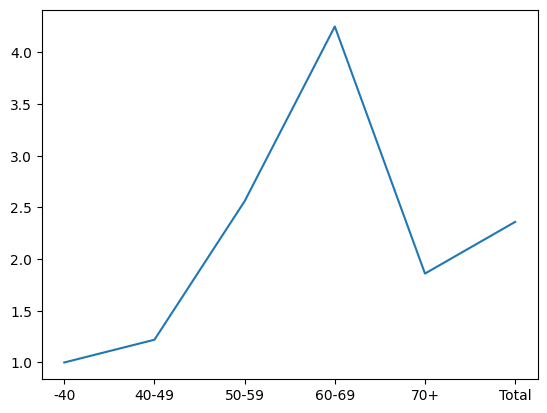

In [26]:
plt.plot(bv_age.index, bv_age['OddRatio'])